Text(0, 0.5, 't')

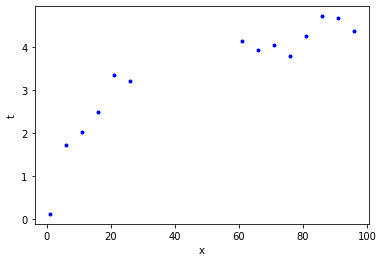

In [45]:
# Data loader - DO NOT MODIFY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))
# x and t are 2d arrays of shape (N,1) where N is the number of data points
plt.figure()
plt.plot(x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')

In [46]:
print(x)
xtrainval = x[1::2]
print(xtrainval)
print(xtrainval.flatten())
print(df[:,1][1::2])

[[ 1.]
 [ 6.]
 [11.]
 [16.]
 [21.]
 [26.]
 [61.]
 [66.]
 [71.]
 [76.]
 [81.]
 [86.]
 [91.]
 [96.]]
[[ 6.]
 [16.]
 [26.]
 [66.]
 [76.]
 [86.]
 [96.]]
[ 6. 16. 26. 66. 76. 86. 96.]
[ 6. 16. 26. 66. 76. 86. 96.]


# Question One:
Use 3-fold cross-validation to select an optimal polynomial model using least squares estimation without regularization. In the notebook:
1. State the optimal degree of polynomial and print its parameters accurate to three decimal places.
2. Plot the fitted line and comment on whether it appears to represent the data well. Do you think it will generalise well to unseen data?
3. State clearly your estimates of t for the missing values of x

Order & Train & Valid \\
0 & 0.869 & 0.943
1 & 0.240 & 0.536
2 & 0.200 & 0.510
3 & 0.087 & 1.009
4 & 0.000 & 4.587
5 & 0.000 & 0.860
6 & 0.000 & 1.344
7 & 0.000 & 1.432


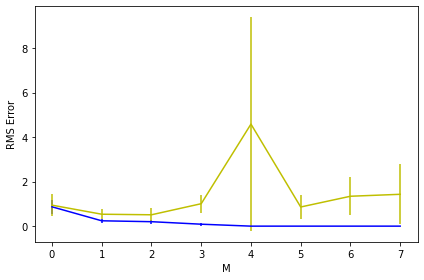

In [48]:
# Construct the dataset

'''
xtrainval = np.concatenate((x[0:2], x[3:5], x[6:8], x[10:11], x[12:]), axis=0)
ttrainval = np.concatenate((t[0:2], t[3:5], t[6:8], t[10:11], t[12:]), axis=0)
xtest = np.concatenate((x[2:3], x[5:6], x[8:10], x[11:12]), axis=0)
ttest = np.concatenate((t[2:3], t[5:6], t[8:10], t[11:12]), axis=0)
Folds = [ trainval[0:3], trainval[3:6], trainval[6:] ]
'''

# The combined data for cross-validation: 7pts
xtrainval = x[1::2].flatten()
ttrainval = t[1::2].flatten()

# The test set: 7pts
xtest = x[0::2].flatten()
ttest = t[0::2].flatten()

# We now split the dataset into three random folds

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:2], trainval[2:5], trainval[5:] ]

M = [0,1,2,3,4,5,6,7] # Max polynomial order set to 7 because the training 
K = 3 # Number of folds
rmstrain = [] # Error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # Standard deviation over the training sets
stdvalid = [] # Standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')

print("Order & Train & Valid \\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

Training loss = 0.22
Test loss = 0.48


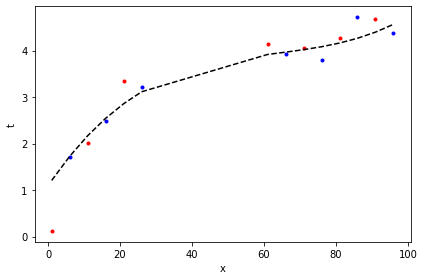

In [50]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
hiPhi = np.array([pow(x.flatten(),j) for j in range(0,polyorder+1)]).transpose()
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrainval))
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain,2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")
# Plot the data
plt.figure()
plt.plot(xtrainval,ttrainval,'b.')
plt.plot(xtest,ttest,'r.')
plt.plot(x.flatten(),np.matmul(hiPhi,w),'k--')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('cross-validation-result.png')

# Question Two:
Compute the posterior distribution of the model parameters for the optimal model with all data points included. Assume a Gaussian Prior with mean $m_0=0$ and covariance $S_0=α^{−1}I$. Set $α=2.0$.
1. Compare the value of the mean of the posterior with your maximum likelihoood estimate.
2. Comment on your finding.
3. Under what circumstances would the maximum likelihood estimate be identical to the mean of the posterior? Verify that this is the case.